In [1]:
import os 
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import platform
import folium
import json

In [5]:
if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
matplotlib.rcParams['axes.unicode_minus'] = False

In [10]:
df = pd.read_csv('sprint2_base/20201230all2.csv')
df['설비용량']*365


0     3053955
1     7306205
2     3563860
3     5239210
4      113880
5      214255
6       61685
7     2414110
8      345655
9      217175
10    2409730
11    5136645
12    4964365
13    1811130
14     600060
15    9185225
16     514285
Name: 설비용량, dtype: int64

In [7]:
df2 = df.groupby(['세부지역'])['설비용량'].sum().reset_index()
df2

,세부지역,설비용량
0,강원도,8367
1,경기도,20017
2,경상남도,9764
3,경상북도,14354
4,광주시,312
5,대구시,587
6,대전시,169
7,부산시,6614
8,서울시,947
9,세종시,595


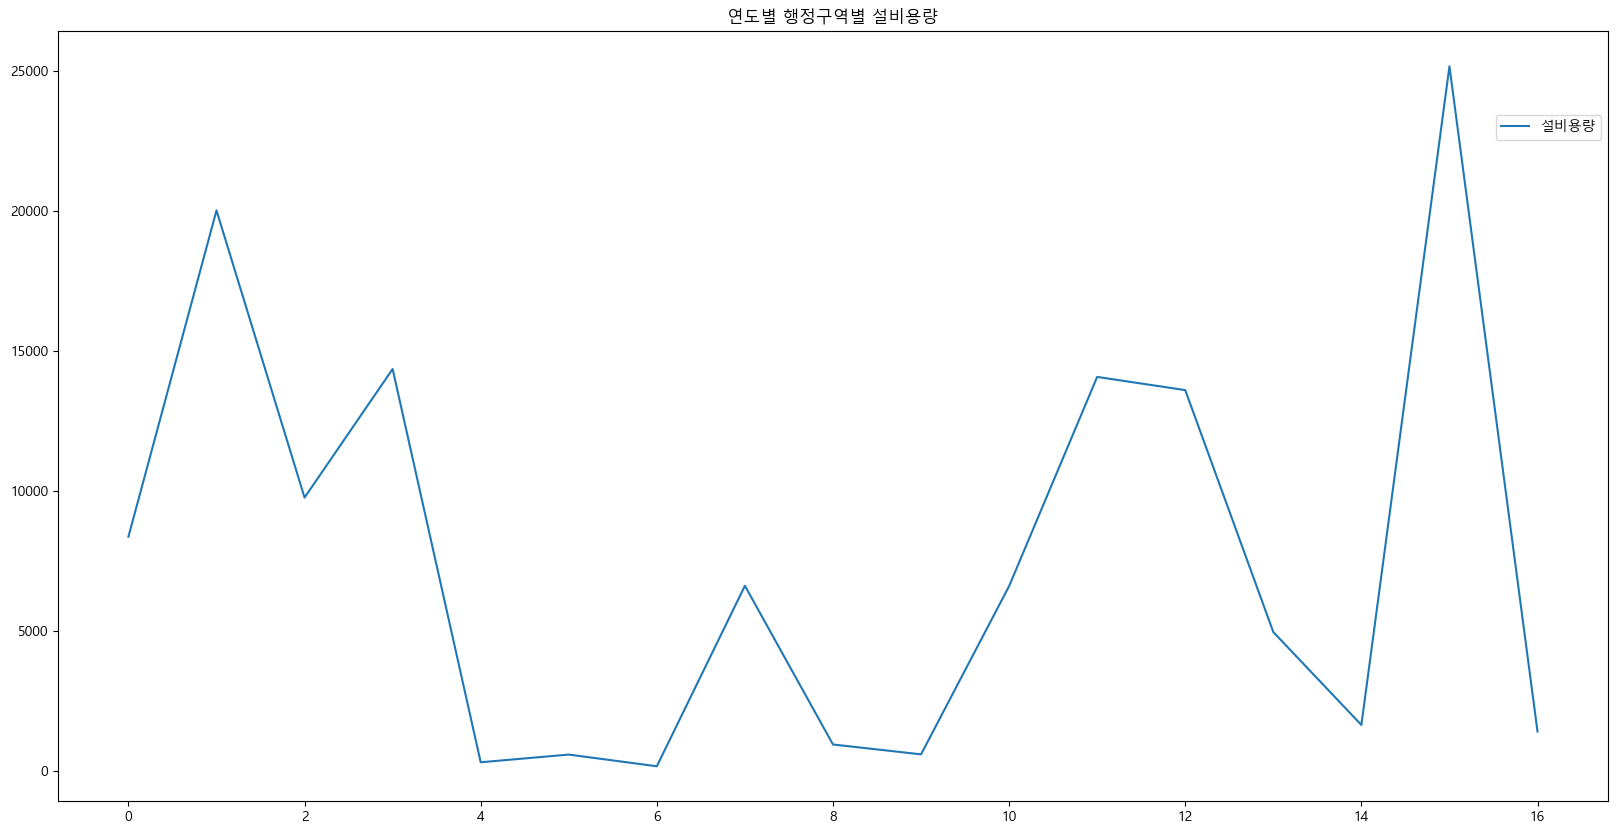

In [8]:
# 꺾은 선 그래프 그리기
df2.plot(figsize=(20, 10))
plt.legend(loc='upper right', bbox_to_anchor = (1, 0.9))
plt.title('연도별 행정구역별 설비용량')
plt.show()

In [13]:
df2.to_csv('20201230all2.csv', index=False)

In [10]:
map_center = [37.55, 126.98]
m = folium.Map(location=map_center, zoom_start=7)

folium.Choropleth(
    geo_data='C:/sp2/TL_SCCO_CTPRVN.json',
    data=df2,
    columns=['세부지역', '설비용량'],
    key_on='feature.properties.CTP_KOR_NM',
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.5,
    legend_name='설비용량 (MW)',
    highlight=True,
).add_to(m)

m